In [1]:
import pandas as pd
import datetime as dt
from prophet import Prophet

data = pd.read_csv("../raw_data/stock_prices_latest.csv",parse_dates = True)
data.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [3]:
data.shape

(23528435, 9)

In [2]:
data['date'] = pd.to_datetime(data['date'])

In [3]:
import numpy as np

stocks_df= data[(data.symbol=="JPM")]
stocks_df= stocks_df[(stocks_df.date.dt.year > 2000 ) & (stocks_df.date.dt.year < 2006)]
stocks_df.sort_values(by=["date"], inplace=True)
stocks_df

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
12067327,JPM,2001-01-02,43.37,43.37,41.92,42.58,25.3191,7803200,1.0
12069767,JPM,2001-01-03,49.60,49.60,42.10,49.35,29.9393,21303200,1.0
12070173,JPM,2001-01-04,52.64,52.64,49.54,50.69,30.7522,26409800,1.0
12069957,JPM,2001-01-05,50.21,50.21,47.10,47.71,28.9443,16215700,1.0
12068610,JPM,2001-01-08,48.87,48.87,47.10,48.01,29.1263,9938300,1.0
...,...,...,...,...,...,...,...,...,...
12068145,JPM,2005-12-23,40.12,40.42,40.01,40.20,29.5985,7005900,1.0
12069888,JPM,2005-12-27,40.40,40.56,39.97,40.10,29.5249,7752400,1.0
12067498,JPM,2005-12-28,40.11,40.23,39.82,39.91,29.3850,9526900,1.0
12068469,JPM,2005-12-29,39.86,40.05,39.80,39.86,29.3482,7390000,1.0


In [32]:
#import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df = stocks_df[(data.date.dt.year == 2016) | (data.date.dt.year == 2020)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

# Selectionner 10 actions de secteurs differents sur une periode de deux ans.
# GS,WMT,AAPL,AMZN,JPM,BA,CCL,CVX,KO,MSFT


In [6]:
stocks_df.shape

(1256, 9)

In [7]:
stocks_df = stocks_df[["date", "close_adjusted"]].copy()  #à verifier, si il faut garder le .copy() ou pas
stocks_df.rename(columns={"date": "ds", "close_adjusted": "y"}, inplace=True)
stocks_df

,ds,y
12067327,2001-01-02,25.3191
12069767,2001-01-03,29.9393
12070173,2001-01-04,30.7522
12069957,2001-01-05,28.9443
12068610,2001-01-08,29.1263
...,...,...
12068145,2005-12-23,29.5985
12069888,2005-12-27,29.5249
12067498,2005-12-28,29.3850
12068469,2005-12-29,29.3482


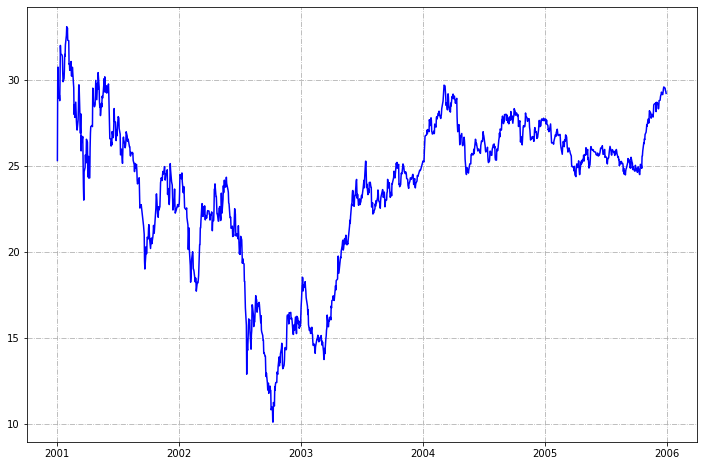

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(stocks_df['ds'], stocks_df['y'], 'b')
plt.show()

In [9]:
index=round(len(stocks_df)*80/100)
index

1005

In [10]:
train = stocks_df.iloc[:index]
test = stocks_df.iloc[index:]

In [11]:
train.shape, test.shape

((1005, 2), (251, 2))

In [12]:
train

,ds,y
12067327,2001-01-02,25.3191
12069767,2001-01-03,29.9393
12070173,2001-01-04,30.7522
12069957,2001-01-05,28.9443
12068610,2001-01-08,29.1263
...,...,...
12069615,2004-12-28,27.7779
12069246,2004-12-29,27.7425
12069241,2004-12-30,27.6858
12066945,2004-12-31,27.6362


In [13]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
horizon = 36
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1036,2007-09-01,-43.183774,-1137.793440,1043.268627
1037,2007-10-01,20.213667,-513.622700,573.887861
1038,2007-11-01,20.792043,-558.268138,628.590757
1039,2007-12-01,-41.956464,-1346.094648,1177.394503
1040,2008-01-01,20.608691,-613.734552,701.227353


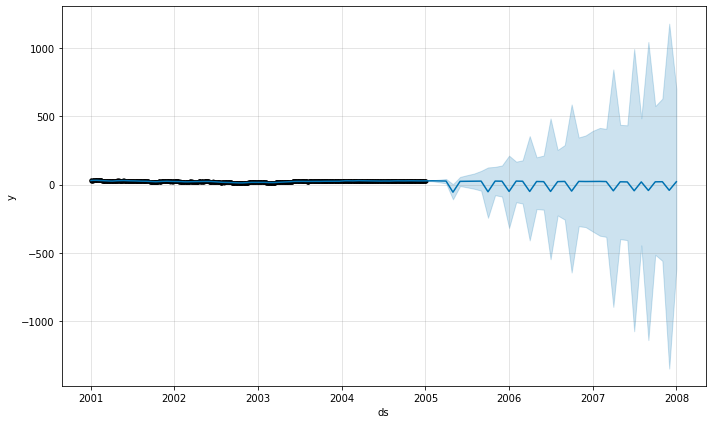

In [15]:
ax = model.plot(forecast);

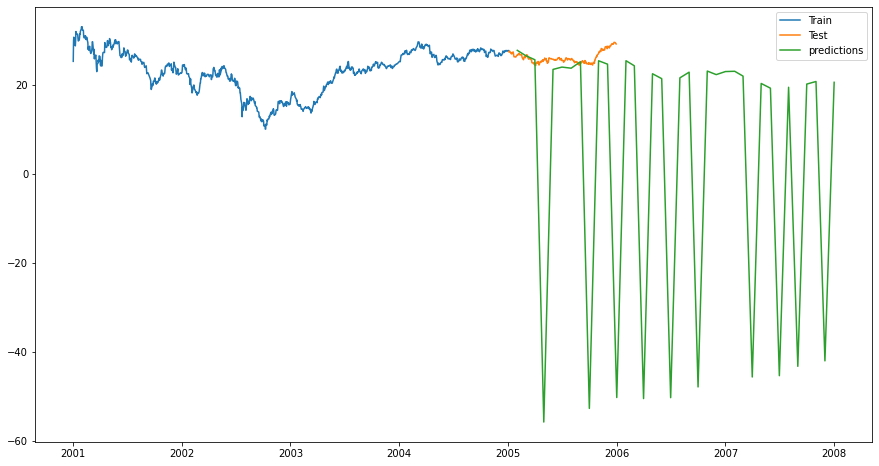

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

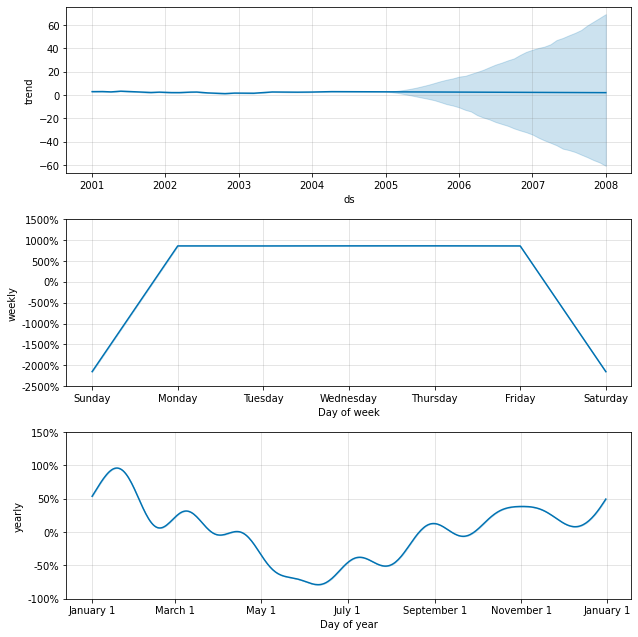

In [17]:
model.plot_components(forecast);

In [19]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
# Your code here
cv_results = cross_validation(model=model, initial=f'{100 * 5} days', horizon='35 days', period='180 days')

# Comment choisir le chiffre initial {XX*5} et horizon 'XX days' (ici initial=20 et horizon=75)

INFO:prophet:Making 7 forecasts with cutoffs between 2001-12-15 00:00:00 and 2004-11-29 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [20]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2001-12-17,23.858462,22.320652,25.385097,22.8458,2001-12-15
1,2001-12-18,23.921240,22.471083,25.399742,23.1508,2001-12-15
2,2001-12-19,24.110151,22.712451,25.604490,23.6551,2001-12-15
3,2001-12-20,24.374320,22.961871,25.822692,22.7338,2001-12-15
4,2001-12-21,24.376694,22.892915,25.827994,22.2544,2001-12-15
...,...,...,...,...,...,...
159,2004-12-28,27.159601,23.233800,30.185824,27.7779,2004-11-29
160,2004-12-29,27.304260,23.211800,30.940946,27.7425,2004-11-29
161,2004-12-30,27.415379,22.850472,30.666679,27.6858,2004-11-29
162,2004-12-31,27.471006,22.889895,31.285216,27.6362,2004-11-29


In [21]:
stocks_df_p = performance_metrics(cv_results)
stocks_df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,0.698800,0.835943,0.679613,0.029234,0.031096,0.029619,0.937500
1,5 days,1.236230,1.111859,0.881174,0.036985,0.034809,0.037611,0.862500
2,6 days,1.988826,1.410257,1.137687,0.048248,0.043450,0.049073,0.750000
3,7 days,2.528042,1.589982,1.316278,0.056183,0.051871,0.057407,0.687500
4,8 days,2.738591,1.654869,1.330418,0.056919,0.051956,0.058415,0.662500
5,9 days,2.623857,1.619832,1.279180,0.055041,0.051950,0.056198,0.637500
6,10 days,2.340282,1.529798,1.205532,0.052251,0.051950,0.053454,0.650000
7,11 days,2.411807,1.553000,1.252129,0.054503,0.054900,0.055082,0.612500
8,12 days,3.168113,1.779919,1.515708,0.065454,0.058845,0.066068,0.562500
9,13 days,4.197078,2.048677,1.803607,0.077154,0.084522,0.077928,0.484375


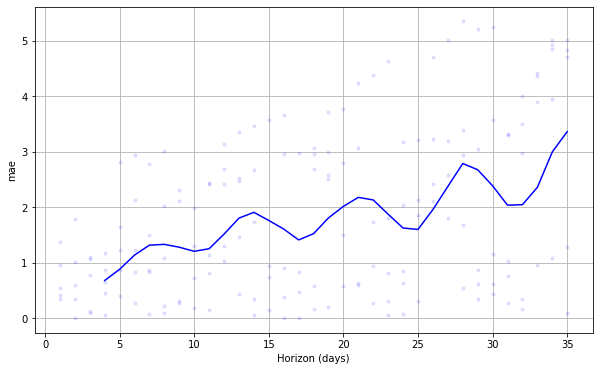

In [23]:
# Plot results below
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mae');